In [14]:
from pickle import load
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread

from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift

In [12]:
with open('data/gen_trajs.p', 'r') as f:
    trajs = load(f)
street = imread('street.png')

In [18]:
trajs['nn'][0]

array([[ 419.09540809,  714.2703701 ],
       [ 423.24068308,  722.10450898],
       [ 504.18807485,  702.23331414],
       [ 510.00077223,  696.21897863],
       [ 512.93165389,  691.55340294],
       [ 513.25615299,  683.24102763],
       [ 513.33683249,  647.07341488],
       [ 515.02980275,  639.92318924],
       [ 512.92798592,  629.90668204],
       [ 513.66642702,  622.15307735],
       [ 516.23425293,  610.58422852],
       [ 516.77050781,  595.2041626 ],
       [ 508.19277954,  579.8449707 ],
       [ 503.80715942,  562.99584961],
       [ 499.16885376,  547.62506104],
       [ 490.96398926,  534.04345703],
       [ 483.01190186,  520.65612793],
       [ 474.47421265,  506.29489136],
       [ 465.87908936,  491.62969971],
       [ 456.60598755,  477.7678833 ],
       [ 446.52246094,  464.60870361],
       [ 435.62524414,  452.2432251 ],
       [ 425.08566284,  440.47216797],
       [ 414.08978271,  429.46508789],
       [ 402.93560791,  419.11074829],
       [ 391.97653198,  4

In [23]:
nn_trajs = np.array(trajs['nn']).reshape(-1, 80)
lin_trajs = np.array(trajs['lin']).reshape(-1, 80)
rf_trajs = np.array([trajs['rf']]).reshape(-1, 80)

In [57]:
nn_trajs.shape

(276, 80)

In [41]:
km_nn = KMeans(n_clusters=6, n_jobs=12)
km_nn.fit(nn_trajs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=12, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [46]:
km_lin = KMeans(n_clusters=6, n_jobs=12)
km_lin.fit(lin_trajs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=12, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
km_rf = KMeans(n_clusters=6, n_jobs=12)
km_rf.fit(rf_trajs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=12, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

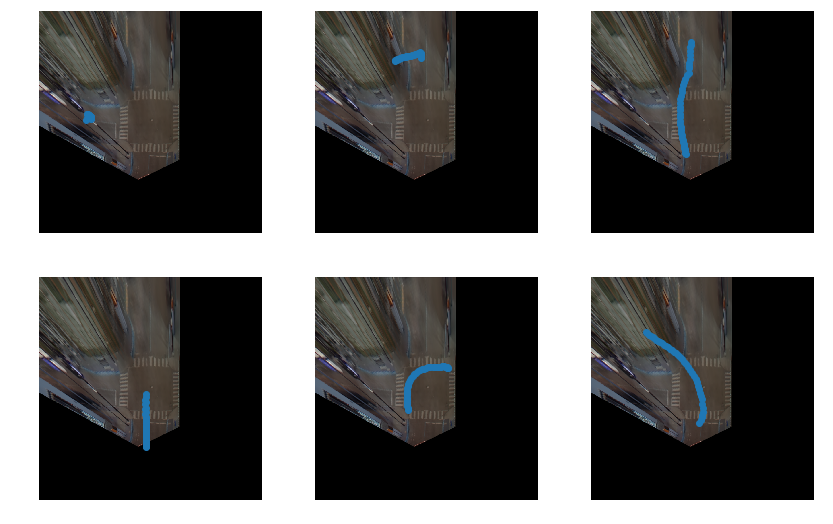

In [56]:
plt.figure(figsize=(14,9))
for i in range(6):
    plt.subplot(200+30+i+1)
    plt.axis('off')
    plt.imshow(street)
    traj_i = km_nn.cluster_centers_[i].reshape(40,2)
    plt.scatter(traj_i[:,0], traj_i[:,1])
plt.show()

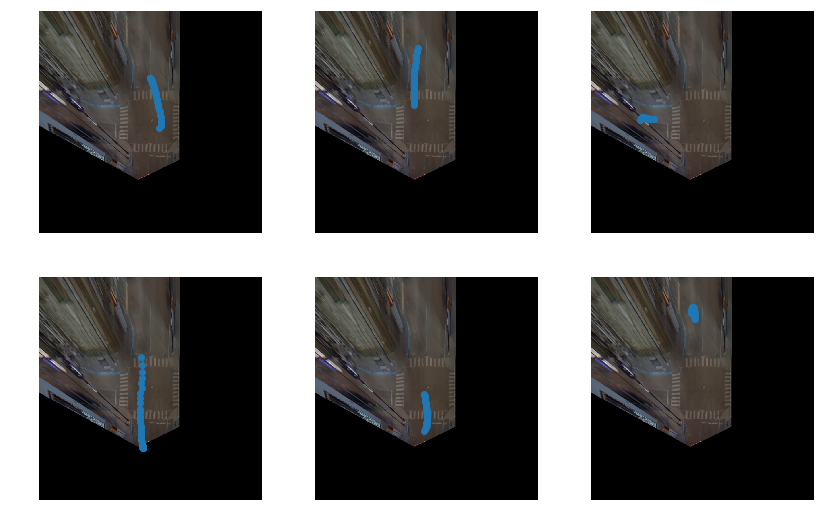

In [55]:
plt.figure(figsize=(14,9))
for i in range(6):
    plt.subplot(200+30+i+1)
    plt.axis('off')
    plt.imshow(street)
    traj_i = km_lin.cluster_centers_[i].reshape(40,2)
    plt.scatter(traj_i[:,0], traj_i[:,1])
plt.show()

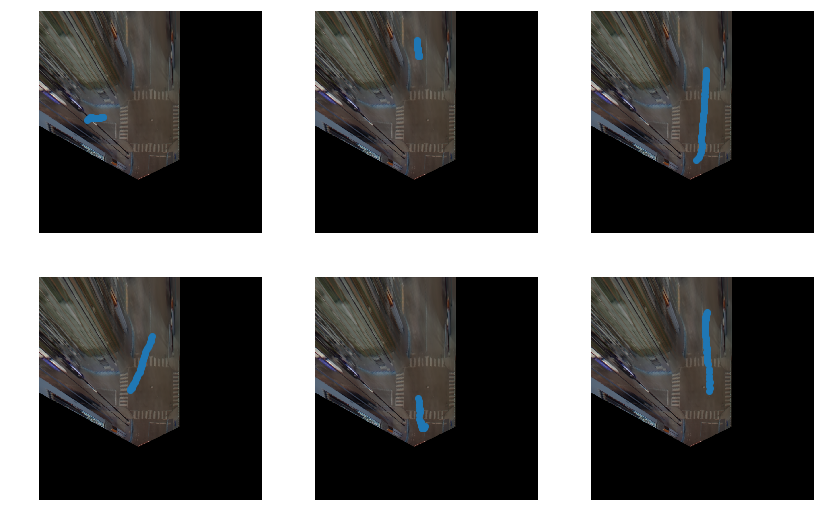

In [54]:
plt.figure(figsize=(14, 9))
for i in range(6):
    plt.subplot(200+30+i+1)
    plt.axis('off')
    plt.imshow(street)
    traj_i = km_rf.cluster_centers_[i].reshape(40,2)
    plt.scatter(traj_i[:,0], traj_i[:,1])
plt.show()